# LAB Example

## Problem Definition
Two datasets are available: London crime and census data.
Crimes are grouped by location and time.
Spatial granularity: district level.
Temporal granularity: month.
Goal: study the number of crimes in each location and time.


## Pre-processing
Importing the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
crime = pd.read_csv("data/MPS_Ward_Level_Crime_Historic_NewWard.csv")
census = pd.read_csv("LondonCensus.csv")

First look at the data.

In [3]:
crime.head()

,WardCode,WardName,Borough,MajorCategory,MinorCategory,T_201004,T_201005,T_201006,T_201007,T_201008,...,T_201803,T_201804,T_201805,T_201806,T_201807,T_201808,T_201809,T_201810,T_201811,T_201812
0,E05000026,Abbey,Barking and Dagenham,Burglary,Burglary In A Dwelling,9,4,6,6,12,...,8,5,5,4,6,3,6,6,4,8
1,E05000027,Alibon,Barking and Dagenham,Burglary,Burglary In A Dwelling,7,3,8,12,12,...,7,1,5,3,2,4,4,8,4,10
2,E05000028,Becontree,Barking and Dagenham,Burglary,Burglary In A Dwelling,10,6,21,7,13,...,7,8,6,4,7,3,6,5,10,9
3,E05000029,Chadwell Heath,Barking and Dagenham,Burglary,Burglary In A Dwelling,10,10,11,8,13,...,7,5,8,6,5,4,8,5,10,8
4,E05000030,Eastbrook,Barking and Dagenham,Burglary,Burglary In A Dwelling,3,5,2,6,4,...,5,2,1,2,3,3,6,6,11,2


In [4]:
census.head()

,WardCode,WardName,borough,NESW,AreaSqKm,lon,lat,IncomeScor,LivingEnSc,NoEmployee,GrenSpace,PopDen,BornUK,NotBornUK,NoCTFtoH,NoDwelling,NoFlats,NoHouses,NoOwndDwel,MedHPrice
0,E05000026,Abbey,Barking and Dagenham,East,1.3,0.077935,51.539711,0.27,42.76,7900,19.6,9884.6,5459,7327,0.1,4733,3153,1600,1545,177000
1,E05000027,Alibon,Barking and Dagenham,East,1.4,0.148270,51.545589,0.28,27.96,800,22.4,7464.3,7824,2561,0.1,4045,574,3471,1849,160000
2,E05000028,Becontree,Barking and Dagenham,East,1.3,0.118957,51.554534,0.25,31.59,1100,3.0,8923.1,8075,3470,0.1,4378,837,3541,2093,170000
3,E05000029,Chadwell Heath,Barking and Dagenham,East,3.4,0.139985,51.584751,0.27,34.78,1700,56.4,2970.6,7539,2482,0.4,4050,1400,2662,2148,195000
4,E05000030,Eastbrook,Barking and Dagenham,East,3.5,0.173581,51.553648,0.19,21.25,4000,51.1,3014.3,8514,1992,0.5,3976,742,3235,2646,191750


## Data Preparation

Several steps need to be done here.
As an example, check whether data contains null values or outliers.
The Seaborn package has an Heatmap object useful to see whether our data contains missing data.

In [5]:
from seaborn import heatmap

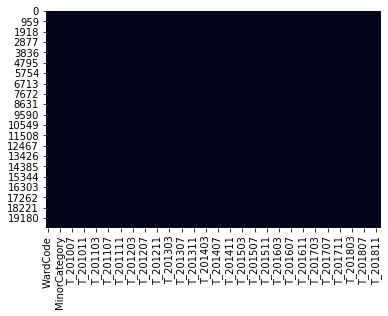

In [6]:
heatmap(crime.isnull(), cbar=False)

Check also for census

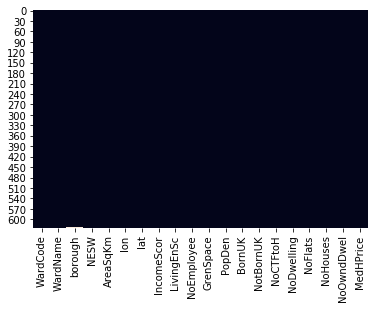

In [7]:
heatmap(census.isnull(), cbar=False)

Another important step is to check the consistency between the two datasets.
You can see that both datasets contain the field WordCode.
Does this field contain the same values in the two datasets?

In [8]:
crime.WardCode.nunique()

629

In [9]:
census.WardCode.nunique()

625

In [10]:
np.unique(np.intersect1d(crime.WardCode.values,census.WardCode.values)).shape[0]


570

The code above shows that in the crime data, the WordCode field contains 629 unique values. Whereas, the census data contains 625 unique values of WordCode. The two datasets have in common 570 unique values, which is a not perfect overlap, but big enough.

Further cleaning may be required to inspect those values which are different and study whether they can be corrected to have an higher overlap. Usually these kinds of steps require time, so here I just give you some examples.

## Preliminary
Before starting with our hypotheses, let’s have a quick look at the kind of crimes contained in our data.

In [11]:
crime.MajorCategory.value_counts()

Theft and Handling             5030
Violence Against The Person    4403
Criminal Damage                2516
Drugs                          1887
Fraud or Forgery               1258
Burglary                       1258
Sexual Offences                1258
Robbery                        1258
Other Notifiable Offences      1258
Name: MajorCategory, dtype: int64

In [12]:
crime.MinorCategory.value_counts()

Other Fraud or Forgery                    629
Other Sexual                              629
Burglary In A Dwelling                    629
Personal Property                         629
Other Criminal Damage                     629
Other Notifiable                          629
Offensive Weapon                          629
Wounding/GBH                              629
Going Equipped                            629
Theft from Motor Vehicle                  629
Rape                                      629
Other Theft                               629
Business Property                         629
Common Assault                            629
Drug Trafficking                          629
Theft Person                              629
Motor Vehicle Interference & Tampering    629
Theft/Taking of Motor Vehicle             629
Murder                                    629
Handling Stolen Goods                     629
Counted per Victim                        629
Other Drugs                       

You can see that the data contains a number of different crimes having different nature. It does not make sense to consider all of them equally important. As an example, Violence Against The Person cannot grouped with Drugs.

For this reason, I propose a method focusing on the Violence Against The Person only. A similar method can be defined for the other crimes.


## Hypothesis
Below the hypotheses we can formulate:

* **H1.** Higher crimes occurs in late years.
* **H2.** Higher crimes occurs in poor areas.
* **H3.** Higher crimes occurs in deprived areas.
* **H4.** Higher crimes occurs in areas where there is high unemployment rate.
* **H5.** Higher crimes occurs in densely built areas.
* **H6.** Higher crimes occurs in areas having high immigration rates.

All hypotheses are falsifiable by using our data. In fact, the following metrics can help us to prove/disprove them.

## Metrics
To prove/disprove our hypotheses, we can propose the following metrics:

* *year.* The year when a crime occurs. This metrics is linked to **H1**.
* *IncomeScor.* The income score from our census data. Higher score means lower income and poorer areas. This is linked to **H2**.
* *RatioCTFtoH.* Ratio of properties in council tax band F-H (the highest median house price). It is defined as $RatioCTFtoH=\frac{NoCTFtoH}{NoDwelling}$.
This is another metric related to poverty. It is also linked to **H2**.
* *RatioOwndDwel.* Ratio of owned properties in each ward. It is defined as $RatioOwndDwel=\frac{NoOwndDwel}{NoDwelling}$. It is based on the rationale that poor people rent and do not own houses. It is also linked to **H2**.
* *LivingEnSc.* Quality of the local environment. The more deprived is an area, the higher the score. It is linked to **H3**.
* *RatioEmployee.* Ratio of people having an occupation. It is defined as $RatioEmployee=\frac{NoEmployee}{PopDen \cdot AreaSqKm}$. It is linked to **H4**.
* *GrenSpace.* Percentage of green space associated with the ward. It is linked to **H5**. In fact, densely built areas have a low percentage of green space.
* *RatioBornUK.* Ratio of people who were born in the UK. It is defined as $RatioBornUK=\frac{BornUK}{BornUK+NotBornUK}$
. It is linked to **H6**.


## Data processing

We need to trasform our data from the format:
$\langle WardCode,WardName,NESW,Borough,MajorCategory,MinorCategory,T_201004,…,T_201801 \rangle$
$\langle WardCode,WardName,AreaSqKm,lon,lat,IncomeScor,…,MedHPrice \rangle$

Into the format:
$\langle cnt,year,IncomeScor,LivingEnSc,RatioEmployee,GrenSpace,RatioBornUK,RatioCTFtoH,RatioOwndDwel \rangle$

Let’s perform this transformation.

The following line considers only the *Violence Against The Person crimes*. 

For starter, it transforms crime data it into a table swapping the columns **T_201004,…,T_201801**
 into rows (the new column representing *T_201004,…,T_201801* is called **variable**). 
 
 Then for each **WardCode,variable** it counts the number of crimes. 
 
 Finally, it extracts the **year** from the string *T_201004,…,T_201801*.

In [13]:
crime2 = pd.melt(crime.loc[crime['MajorCategory']=="Violence Against The Person"], 
              id_vars = ["WardCode", "MajorCategory", "MinorCategory"],
              value_vars = np.setdiff1d( crime.columns.values, ["WardCode", "WardName", 
                                                         "Borough", "MajorCategory","MinorCategory"] ))
crime2.head()

,WardCode,MajorCategory,MinorCategory,variable,value
0,E05000026,Violence Against The Person,Assault with Injury,T_201004,20
1,E05000027,Violence Against The Person,Assault with Injury,T_201004,9
2,E05000028,Violence Against The Person,Assault with Injury,T_201004,13
3,E05000029,Violence Against The Person,Assault with Injury,T_201004,9
4,E05000030,Violence Against The Person,Assault with Injury,T_201004,5


In [14]:
crime3=crime2.groupby(['WardCode','variable']).aggregate({'value':'sum'})
crime3

value
WardCode  variable       
E05000026 T_201004     67
          T_201005     53
          T_201006     62
          T_201007     45
          T_201008     46
...                   ...
E05009405 T_201808     37
          T_201809     35
          T_201810     27
          T_201811     33
          T_201812     31

[66045 rows x 1 columns]

In [15]:
crime3.reset_index(inplace=True)  
crime3.rename(columns={'value':'cnt'},inplace=True)
crime3

,WardCode,variable,cnt
0,E05000026,T_201004,67
1,E05000026,T_201005,53
2,E05000026,T_201006,62
3,E05000026,T_201007,45
4,E05000026,T_201008,46
...,...,...,...
66040,E05009405,T_201808,37
66041,E05009405,T_201809,35
66042,E05009405,T_201810,27
66043,E05009405,T_201811,33


In [16]:
crime3['year'] = crime3['variable'].str.slice(2, 6)
crime3

,WardCode,variable,cnt,year
0,E05000026,T_201004,67,2010
1,E05000026,T_201005,53,2010
2,E05000026,T_201006,62,2010
3,E05000026,T_201007,45,2010
4,E05000026,T_201008,46,2010
...,...,...,...,...
66040,E05009405,T_201808,37,2018
66041,E05009405,T_201809,35,2018
66042,E05009405,T_201810,27,2018
66043,E05009405,T_201811,33,2018


The following line computes our defined metrics for census data.

In [17]:
census['RatioEmployee']=census.NoEmployee/(census.PopDen*census.AreaSqKm)
census['RatioBornUK']=census.BornUK/(census.BornUK+census.NotBornUK)
census['RatioCTFtoH']=census.NoCTFtoH/census.NoDwelling
census['RatioOwndDwel']=census.NoOwndDwel/census.NoDwelling
census2=census[['WardCode', 'IncomeScor','LivingEnSc','RatioEmployee','GrenSpace','RatioBornUK','RatioCTFtoH','RatioOwndDwel']]
census2

,WardCode,IncomeScor,LivingEnSc,RatioEmployee,GrenSpace,RatioBornUK,RatioCTFtoH,RatioOwndDwel
0,E05000026,0.27,42.76,0.614787,19.6,0.426951,0.000021,0.326431
1,E05000027,0.28,27.96,0.076555,22.4,0.753394,0.000025,0.457108
2,E05000028,0.25,31.59,0.094827,3.0,0.699437,0.000023,0.478072
3,E05000029,0.27,34.78,0.168316,56.4,0.752320,0.000099,0.530370
4,E05000030,0.19,21.25,0.379145,51.1,0.810394,0.000126,0.665493
...,...,...,...,...,...,...,...,...
620,E05000646,0.14,45.24,2.180002,30.0,0.553865,0.007349,0.301198
621,E05000647,0.11,48.05,2.010634,4.0,0.560999,0.008847,0.329709
622,E05000648,0.33,45.59,0.250980,19.2,0.485461,0.002058,0.225477
623,E05000649,0.09,60.14,18.226415,3.9,0.432246,0.008501,0.187030


Finally, we can join the two datasets.

In [18]:
mydata=pd.merge(crime3,census2,on='WardCode')
del mydata['WardCode']
del mydata['variable']
mydata

,cnt,year,IncomeScor,LivingEnSc,RatioEmployee,GrenSpace,RatioBornUK,RatioCTFtoH,RatioOwndDwel
0,67,2010,0.27,42.76,0.614787,19.6,0.426951,0.000021,0.326431
1,53,2010,0.27,42.76,0.614787,19.6,0.426951,0.000021,0.326431
2,62,2010,0.27,42.76,0.614787,19.6,0.426951,0.000021,0.326431
3,45,2010,0.27,42.76,0.614787,19.6,0.426951,0.000021,0.326431
4,46,2010,0.27,42.76,0.614787,19.6,0.426951,0.000021,0.326431
...,...,...,...,...,...,...,...,...,...
59845,205,2018,0.09,60.14,18.226415,3.9,0.432246,0.008501,0.187030
59846,231,2018,0.09,60.14,18.226415,3.9,0.432246,0.008501,0.187030
59847,237,2018,0.09,60.14,18.226415,3.9,0.432246,0.008501,0.187030
59848,241,2018,0.09,60.14,18.226415,3.9,0.432246,0.008501,0.187030


Below a summary of our final dataset.

In [19]:
mydata.describe()

,cnt,IncomeScor,LivingEnSc,RatioEmployee,GrenSpace,RatioBornUK,RatioCTFtoH,RatioOwndDwel
count,59850.000000,59850.000000,59850.000000,59850.000000,59850.000000,59850.000000,59850.000000,59850.000000
mean,25.841203,0.179368,31.906263,0.484481,27.687719,0.647274,0.002810,0.516130
std,19.237653,0.086512,11.795203,1.260659,17.896338,0.139216,0.003280,0.173842
min,0.000000,0.010000,6.500000,0.043860,0.000000,0.315475,0.000000,0.140243
25%,13.000000,0.110000,22.590000,0.152778,14.300000,0.544268,0.000258,0.387773
50%,22.000000,0.170000,31.125000,0.247751,24.200000,0.640195,0.001481,0.504851
75%,33.000000,0.240000,41.560000,0.415954,38.300000,0.749336,0.004395,0.650520
max,353.000000,0.440000,60.920000,18.231566,88.800000,0.949452,0.020433,0.900398


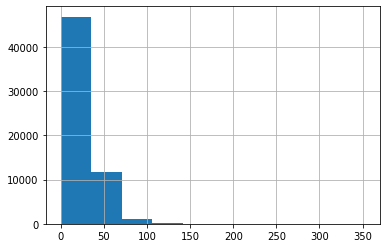

In [20]:
mydata.cnt.hist()

You can note that the variables cnt, RatioBornUK, and RatioCTFtoH
are not normally distributed. 
Therefore, I propose a log transformation to them.

In [21]:
mydata['cnt'] =  np.log10(mydata.cnt+mydata.loc[mydata['cnt']!=0].min().cnt)
mydata['RatioBornUK'] =  np.log10(mydata.RatioBornUK+mydata.loc[mydata['RatioBornUK']!=0].min().RatioBornUK)
mydata['RatioCTFtoH'] =  np.log10(mydata.RatioCTFtoH+mydata.loc[mydata['RatioCTFtoH']!=0].min().RatioCTFtoH)
mydata.describe()

,cnt,IncomeScor,LivingEnSc,RatioEmployee,GrenSpace,RatioBornUK,RatioCTFtoH,RatioOwndDwel
count,59850.000000,59850.000000,59850.000000,59850.000000,59850.000000,59850.000000,59850.000000,59850.000000
mean,1.338717,0.179368,31.906263,0.484481,27.687719,-0.021082,-3.008654,0.516130
std,0.286812,0.086512,11.795203,1.260659,17.896338,0.063461,0.798663,0.173842
min,0.000000,0.010000,6.500000,0.043860,0.000000,-0.200005,-4.841735,0.140243
25%,1.146128,0.110000,22.590000,0.152778,14.300000,-0.065631,-3.565307,0.387773
50%,1.361728,0.170000,31.125000,0.247751,24.200000,-0.019692,-2.825174,0.504851
75%,1.531479,0.240000,41.560000,0.415954,38.300000,0.027272,-2.355580,0.650520
max,2.549003,0.440000,60.920000,18.231566,88.800000,0.102066,-1.689367,0.900398
